# 第八次课-课后练习

本次作业是课后练习，供大家熟练课堂上讲授的基础知识点，不计入任何分数。

请将作业命名为 HW08-课后练习+姓名+学号.ipynb</span>

In [2]:
import pandas as pd
import numpy as np

## 一、`pandas.Series`基础用法

本部分**无需填写代码**，阅读并理解运行结果即可。`pandas.Series`与`numpy.array`和Python内置的列表、字典等，在元素访问和运算操作上都有细微区别，因此本部分中提出的一些特殊情况需要格外注意

### 1.1 `Series`的创建

阅读并运行下面代码，观察输出，理解各个参数取不同类型和值时，创建`pd.Series`的表现

In [3]:
# Creating a Series with default index
data_list = [1, 2, 3, 4]
series_default = pd.Series(data_list)
display(series_default)
display(series_default.index)

0    1
1    2
2    3
3    4
dtype: int64

RangeIndex(start=0, stop=4, step=1)

In [4]:
# Creating a Series with custom index
data_list = [1, 2, 3, 4]
custom_index = ['a', 'b', 'c', 'd']
series_custom_index = pd.Series(data_list, index=custom_index)
display(series_custom_index)
display(series_custom_index.index)

a    1
b    2
c    3
d    4
dtype: int64

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
# Creating a Series with NaN or None values
# Note that the dtype of the Series has changed to float64 (nan in C)
data_with_nan = [1, np.nan, None, 4]
series_with_nan = pd.Series(data_with_nan)
display(series_with_nan)


0    1.0
1    NaN
2    NaN
3    4.0
dtype: float64

In [6]:
# Use a dictionary as input data
data_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4}

# Creating a Series with specified index and data type
# Elements of the index that are not in the dictionary are set to NaN
series_from_dict = pd.Series(
    data=data_dict, 
    index=['a', 'b', 'x', 'y'],
    # Even if we explicitly set dtype to int, 
    # it is still changed to float64
    dtype=int
)

display(series_from_dict)

a    1.0
b    2.0
x    NaN
y    NaN
dtype: float64

### 1.2 `Series`的元素访问

#### 1.2.1 使用`[]`直接访问

阅读并运行以下代码，理解访问`Series`元素的不同方式
- 由于使用`[]`直接访问会有一定混淆性，`pandas`已经表明计划移除position-based access的用法，因此如果你的`pandas`版本较高，以下代码可能会报出Warning

In [7]:
data_dict = {'a': 0, 'bcd': 1, 'aaa': 2, 'ddd': 3}
series = pd.Series(data_dict)

display("Access by position:", series[0])   # Outputs an int
display("Access by label:", series['a'])    # Outputs an int

print("Access with a position list:")      # Outputs a Series
display(series[[0, 2]])
print("Access with a label list:")
display(series[['a']])

try:
    display(series[[0, 'ddd']])
except:
    display("Cannot access elements using a mixture of positions and labels.\n")

print("Access with a position slice:")
display(series[0:3])
print("Access with a label slice:")
display(series['a': 'aaa'])
# Note that [0:3] does not include 3, 
# but ['a':'aaa'] includes 'aaa'

print("Access by condition")
display(series[series >= 2])

/var/folders/wz/k8zp21d91q301dlw5467v5sm0000gn/T/ipykernel_70940/72585049.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display("Access by position:", series[0])   # Outputs an int


'Access by position:'

0

'Access by label:'

0

Access with a position list:


/var/folders/wz/k8zp21d91q301dlw5467v5sm0000gn/T/ipykernel_70940/72585049.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(series[[0, 2]])


a      0
aaa    2
dtype: int64

Access with a label list:


a    0
dtype: int64

'Cannot access elements using a mixture of positions and labels.\n'

Access with a position slice:


a      0
bcd    1
aaa    2
dtype: int64

Access with a label slice:


a      0
bcd    1
aaa    2
dtype: int64

Access by condition


aaa    2
ddd    3
dtype: int64

#### 1.2.2 使用`loc`和`iloc`

因为使用`[]`时，通过位置索引和标签索引都能访问`Series`中的元素，当标签也为数字时，直接使用`[]`会引起混淆，因此在操作`pandas`中的数据结构时，通常都会指定`loc`和`iloc`来明确说明是通过标签还是位置索引访问元素
- 注意`loc`和`iloc`后面跟的是方括号

In [8]:
series = pd.Series(data=[1, 2], index=[1, 2])

# [] can cause confusion
display(series[1])          # label-based access
display(series[1:])         # position-based access (in older version)
                            # may be treated as label-based access in newer version

display(series.loc[1])      # label-based access
display(series.loc[1:])     # label-based access

display(series.iloc[1])     # position-based access
display(series.iloc[1:])    # position-based access

1

2    2
dtype: int64

1

1    1
2    2
dtype: int64

2

2    2
dtype: int64

#### 1.2.3 `pd.Series`与Python字典的对比

- 允许重复的`index`，但字典不允许重复的`key`
- 重写了`__iter__`方法，`iter(pd.Series)`会得到**值**的迭代器，但`iter(dict)`会得到**键**的迭代器
- 但是计算`xxx in yyy`的时候，二者判断的都是`xxx`是否在**键/标签**之中，与值无关


In [9]:
index = [1, 2, 3, 3]
data = ['a', 'b', 'c', 'd']

data_dict = dict(zip(index, data))
series = pd.Series(data, index)

print(data_dict)        # 3 elements
display(series)         # 4 elements
display(series.loc[3])

print(list(data_dict))      # output keys
display(list(series))       # output values

print(1 in data_dict, 'a' in data_dict)
print(1 in series, 'a' in series)

{1: 'a', 2: 'b', 3: 'd'}


1    a
2    b
3    c
3    d
dtype: object

3    c
3    d
dtype: object

[1, 2, 3]


['a', 'b', 'c', 'd']

True False
True False


### 1.3 `Series`的运算

与`numpy.array`类似，`Series`也可以与Python数字类型或另一个`Series`进行运算，但与`numpy.array`不同的是，即使两个`Series`的长度不同或标签不对应，依然能进行运算

In [10]:
a = pd.Series([1, 1], index=['b', 'c'])
b = pd.Series([1, 1, np.nan], index=['a', 'b', 'e'])

# Default: the result will contain the union of indices from both Series 
# Missing values will be represented as NaN where indices are not shared
display(a + b)  
display(a.add(b))   # Equivalent to a+b

# Use the fill_value parameter in the operation function to handle NaN
# For detailed usage information, refer to the official documentation
# https://pandas.pydata.org/docs/reference/api/pandas.Series.add.html
display(a.add(b, fill_value=0))

a    NaN
b    2.0
c    NaN
e    NaN
dtype: float64

a    NaN
b    2.0
c    NaN
e    NaN
dtype: float64

a    1.0
b    2.0
c    1.0
e    NaN
dtype: float64

标签有重复时，会为每一对对应标签分别进行运算（类似广播）

In [11]:
a = pd.Series([1, 2, 3, 4, 5, 6], index=['b', 'b', 'b', 'c', 'c', 'd'])
# We make elements in b complex for clearer illustration
b = pd.Series([6, 5, 4, 3, 2, 1], index=['b', 'c', 'c', 'd', 'd', 'd']) * 1j

display(a + b)

b    1.0+6.0j
b    2.0+6.0j
b    3.0+6.0j
c    4.0+5.0j
c    4.0+4.0j
c    5.0+5.0j
c    5.0+4.0j
d    6.0+3.0j
d    6.0+2.0j
d    6.0+1.0j
dtype: complex128

## 二、`pandas.DataFrame`基础用法

本部分已经提供了参考输出，你的代码运行结果需要与之相同

对于不确定用法的函数/方法，可以参考`pandas`的[官方文档](https://pandas.pydata.org/docs/reference/frame.html)

In [12]:
data = {
   'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Francis', 'Grace', 'Hans', 'Isabella', 'Jason', 'Kate', 'Louis'], 
   'age': [24, 38, 43, 24, 33, 42, 57, 57, 36, 13, 53, 39], 
   'gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'], 
   'height(cm)': [168, 157, 164, 190, 165, 181, 176, 197, 170, 144, 164, 175], 
   'weight(kg)': [53, 76, 59, 68, 60, 89, 70, 90, 67, 38, 68, 59]
}

### 2.1 由`data`生成一个`DataFrame`，命名为`df`，其行索引从1开始递增

In [13]:
# TODO
df = pd.DataFrame(data, index=[i for i in range(1, 13)])
display(df)

,name,age,gender,height(cm),weight(kg)
1,Alice,24,F,168,53
2,Bob,38,M,157,76
3,Carol,43,F,164,59
4,Dave,24,M,190,68
5,Eve,33,F,165,60
6,Francis,42,M,181,89
7,Grace,57,F,176,70
8,Hans,57,M,197,90
9,Isabella,36,F,170,67
10,Jason,13,M,144,38


### 2.2 根据身高和体重计算BMI，并添加到最后一列，列名为`BMI`

计算BMI的公式如下
$$
BMI = \dfrac{weight}{height^2}
$$
其中weight和height的单位分别为kg和m

In [14]:
# TODO
df['BMI'] = df['weight(kg)'] / (df['height(cm)'] * df['height(cm)'] * 0.0001)
display(df)

,name,age,gender,height(cm),weight(kg),BMI
1,Alice,24,F,168,53,18.778345
2,Bob,38,M,157,76,30.832894
3,Carol,43,F,164,59,21.936347
4,Dave,24,M,190,68,18.836565
5,Eve,33,F,165,60,22.038567
6,Francis,42,M,181,89,27.166448
7,Grace,57,F,176,70,22.598140
8,Hans,57,M,197,90,23.190497
9,Isabella,36,F,170,67,23.183391
10,Jason,13,M,144,38,18.325617


### 2.3 将表按照年龄（age）升序排列

In [15]:
# TODO
df = df.sort_values(by=['age'])
display(df)

,name,age,gender,height(cm),weight(kg),BMI
10,Jason,13,M,144,38,18.325617
1,Alice,24,F,168,53,18.778345
4,Dave,24,M,190,68,18.836565
5,Eve,33,F,165,60,22.038567
9,Isabella,36,F,170,67,23.183391
2,Bob,38,M,157,76,30.832894
12,Louis,39,M,175,59,19.265306
6,Francis,42,M,181,89,27.166448
3,Carol,43,F,164,59,21.936347
11,Kate,53,F,164,68,25.282570


### 2.4 统计两种性别年龄、身高、体重、BMI的平均数，结果存储在变量`avg_df`中

In [16]:
# TODO
avg_df = df.groupby(by='gender').mean(['age', 'height(cm)', 'weight(kg)', 'BMI'])
display(avg_df)

,age,height(cm),weight(kg),BMI
gender,,,,
F,41.0,167.833333,62.833333,22.302893
M,35.5,174.000000,70.000000,22.936221


### 2.5 将年龄划分为`'<=24'`、`'24-48'`、`'>48'`三个部分，并在`'age'`的后一列添加`'age_range'`列，表明年龄的所属范围，具体格式见参考输出

In [17]:
# TODO
def judge_age_range(age):
    if age <= 24:
        return '<=24'
    elif age <= 48:
        return '24-48'
    else:
        return '>48'
df.insert(2,'age_range',df['age'].apply(judge_age_range))
display(df)

,name,age,age_range,gender,height(cm),weight(kg),BMI
10,Jason,13,<=24,M,144,38,18.325617
1,Alice,24,<=24,F,168,53,18.778345
4,Dave,24,<=24,M,190,68,18.836565
5,Eve,33,24-48,F,165,60,22.038567
9,Isabella,36,24-48,F,170,67,23.183391
2,Bob,38,24-48,M,157,76,30.832894
12,Louis,39,24-48,M,175,59,19.265306
6,Francis,42,24-48,M,181,89,27.166448
3,Carol,43,24-48,F,164,59,21.936347
11,Kate,53,>48,F,164,68,25.282570


## 三、表数据处理与可视化

本部分我们将使用`pandas`和`matplotlib`对真实数据进行简单处理与分析，数据内容为Bilibili 《工作细胞》评论区内容，数据来自[Kaggle](https://www.kaggle.com/datasets/sherrytp/bilibili-cells-at-work)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

### 3.1 使用`read_csv`读入`bilibili_gongzuoxibao.csv`数据，使用`shape`和`info()`查看数据基本信息，并使用`head`显示数据前十行

In [19]:
# TODO
data = pd.read_csv('bilibili_gongzuoxibao.csv')
print(data.shape)
data.info()
data.head(10)

(19063, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19063 entries, 0 to 19062
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   author         19063 non-null  object
 1   score          19063 non-null  int64 
 2   disliked       19063 non-null  int64 
 3   likes          19063 non-null  int64 
 4   liked          19063 non-null  int64 
 5   ctime          19063 non-null  int64 
 6   content        19063 non-null  object
 7   last_ep_index  19063 non-null  object
 8   cursor         19063 non-null  int64 
 9   date           19063 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.5+ MB


,author,score,disliked,likes,liked,ctime,content,last_ep_index,cursor,date
0,緖山まひろ,10,0,9981,0,1530982477,我有个想法，动物体内的细胞会不会是兽耳呢d(ŐдŐ๑),0,77395314810369,2018-07-07 16:54:37
1,onlylove丶亚丝娜,10,0,1,0,1557139155,题材新颖,0,77395314810369,2019-05-06 10:39:15
2,AKAHANE_铃木羽,10,0,3,0,1556947242,坐等第二季！！表白白细胞∠( ᐛ 」∠)＿,0,77395314810369,2019-05-04 05:20:42
3,妖怪退散,10,0,0,0,1557182714,好看，推荐,0,77395314810369,2019-05-06 22:45:14
4,受虎大王,10,0,0,0,1557118709,涨知识,0,77395314810369,2019-05-06 04:58:29
5,镰刀灬锤子,10,0,2,0,1533402108,以B站的标准，工作细胞完全是9.9分啊，为什么才9.7啊？是有孤儿故意拉低分吗？,0,77395314810369,2018-08-04 17:01:48
6,杳然迹丶,10,0,0,0,1557076185,真滴棒,0,77395314810369,2019-05-05 17:09:45
7,我还是周一到周六,10,0,0,0,1557069219,真的太可爱了呜呜呜，声优表惊艳到爆炸！,0,77395314810369,2019-05-05 15:13:39
8,烦尘羡我,10,0,1,0,1556986422,当时为了这个番剧第一次充大会员～,0,77395314810369,2019-05-04 16:13:42
9,我是锡旺,10,0,1,0,1556971773,虽然番剧涉及的生物知识不是完全正确，但是很好看，也发人深省。,0,77395314810369,2019-05-04 12:09:33


### 3.2 统计`score`列中评分归一化后的分布，并绘制柱状图，在x轴、y轴添加label，并在图上添加标题

Hint:
- 可以使用[`pd.Series.plot.bar`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)为一个Series对象绘制柱状图
- 可以用[`plt.xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel)和[`plt.ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel)给轴添加label
- 可以用[`plt.title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)添加标题

Text(0, 0.5, 'probability')

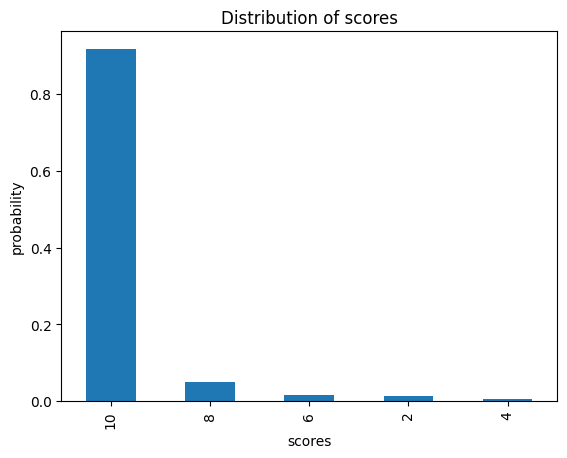

In [20]:
# TODO
scores = data.groupby(by='score')['author'].count()
sum = scores.sum()
normalized_scores = scores / sum
normalized_scores = normalized_scores.sort_values(ascending=False)

ax = normalized_scores.plot.bar()
ax.set_title('Distribution of scores')
ax.set_xlabel('scores')
ax.set_ylabel('probability')

### 3.3 从3.2的图中可以看出，数据分布是极其不均匀的，很难准确看出8分及以下的分布情况。请重新设计一种可视化方式，使得8分及以下评分情况能够更为清晰的展现。

Text(0, 0.5, 'log-scaled count')

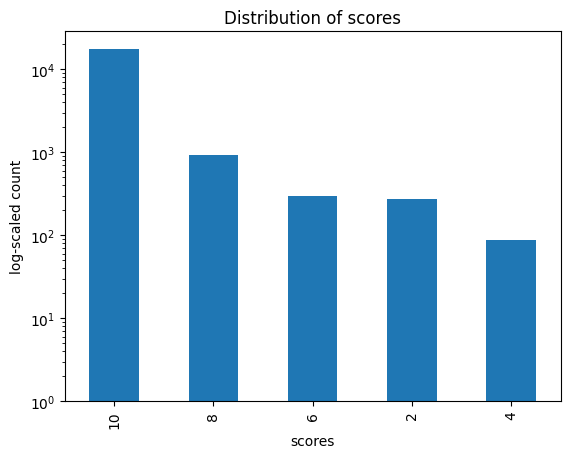

In [21]:
# TODO
sorted_scores = scores.sort_values(ascending=False)
ax = sorted_scores.plot.bar(log=True)
ax.set_title('Distribution of scores')
ax.set_xlabel('scores')
ax.set_ylabel('log-scaled count')

### 3.4 对于每一种评分，计算它所对应所有评论的长度均值与标准差并绘制柱状图

score,2,4,6,8,10
mean,16.639706,23.430233,26.078767,22.015005,18.033696
std,19.546773,25.170730,26.797778,22.885979,18.835227


Text(0.5, 1.0, 'mean and std of comment length')

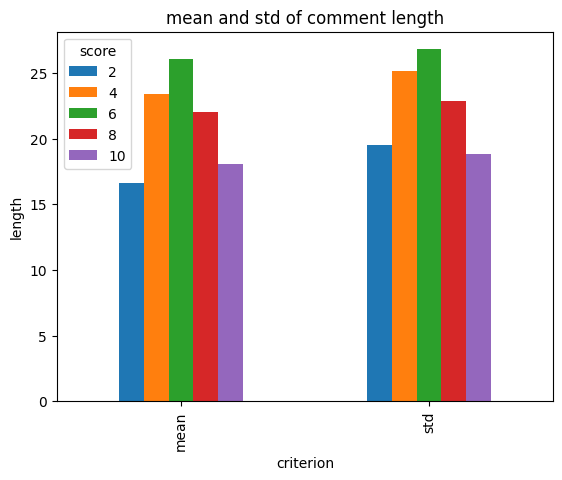

In [22]:
# # TODO
data['content_length'] = data['content'].apply(len)
content_length = data.groupby('score')['content_length']
mean = content_length.mean()
std = content_length.std()
mean_std = pd.DataFrame({'mean': mean, 'std': std})
mean_std = mean_std.T # 只有这样才能画出对的图。。。
# display(mean_std)
ax = mean_std.plot.bar()
ax.set_xlabel('criterion')
ax.set_ylabel('length')
ax.set_title('mean and std of comment length')

### 3.5 对于每一种评分，计算它对应所有评论的长度分布情况并绘制柱状图

评论最长长度为100，如果展示每种评分下每种长度评论的分布，就会导致柱状图有500列，并不适合数据展示；更合适的方法是划分长度区间并展示区间的分布情况，见参考输出的横坐标设置

Hint:这些函数可能会对你的实现有所帮助：[`pd.cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html#pandas-cut)、[`pd.DataFrame.groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)、[`pd.Series.groupy`](https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html#pandas.Series.groupby)、[`pd.Series.unstack`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unstack.html#pandas.Series.unstack)、[`pd.DataFrame.unstack`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack)

Text(0.5, 1.0, 'Distribution of length of comments')

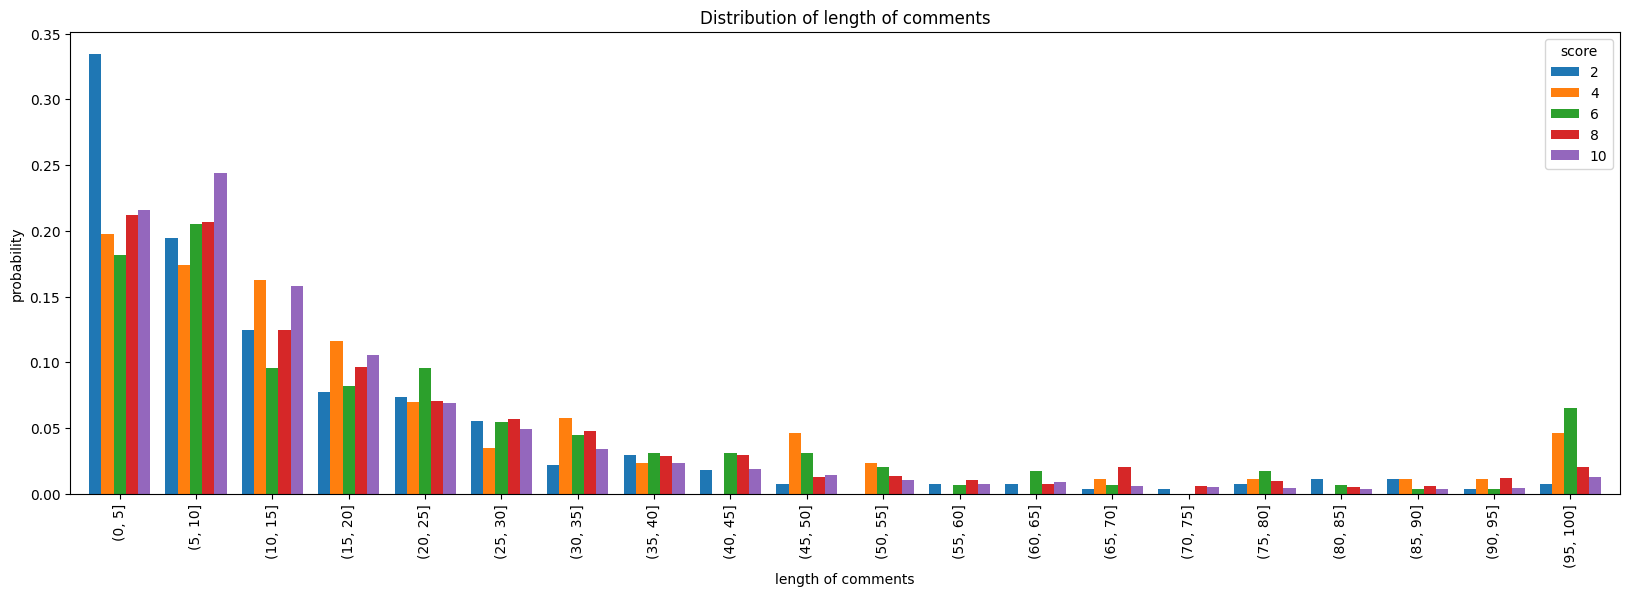

In [23]:
# TODO
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['(0,5]', '(5, 10]', '(15, 20]', '(25, 30]', '(35, 40]', '(45, 50]', '(55, 60]', '(65, 70]', '(75, 80]', '(85, 90]', '(95, 100]']
data['length_range'] = pd.cut(data['content_length'], bins, labels)
# data
sum = data.groupby(by='score')['length_range'].count()
score_length_counts = data.groupby(['length_range', 'score'], observed=True)['author'].count()

portion = score_length_counts / sum
# display(portion)
portion = portion.unstack()
# display(portion)
ax = portion.plot.bar(figsize = (20, 6), width=0.8)
ax.set_xlabel('length of comments')
ax.set_ylabel('probability')
ax.set_title('Distribution of length of comments')